In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
filename = "models/ensembling-gin-virtual-multipleDiffpool-bayesLastLayer-0.12908956011159403/valid-pred-results.csv"
valdf = pd.read_csv(filename)
valdf

,Unnamed: 0,gin-virtual-run2,gin-virtual-bnn-lastLayer,gin-virtual-bnn-lastLayer-run2,gin-virtual-diffpool,gin-virtual-diffpool-run3,gin-virtual-diffpool-8,gin-virtual-diffpool-kamil,molecule_idx,label,mean_pred,std_pred,log_std_pred,error,floor_std_pred
0,0,4.855130,4.825333,4.846446,4.857602,4.893821,4.813933,4.863190,3045360,4.870838,4.850779,0.026128,-3.644747,0.020058,0.0
1,1,5.303571,5.324842,5.334028,5.303278,5.331312,5.303592,5.343327,3045361,5.322547,5.320564,0.016876,-4.081847,0.001982,0.0
2,2,4.976478,5.103709,5.081901,5.092427,5.159584,4.960476,5.015188,3045362,5.240913,5.055680,0.073163,-2.615065,0.185233,0.0
3,3,5.126363,5.182791,5.176788,5.085762,5.216216,5.085498,5.146418,3045363,5.227307,5.145691,0.049843,-2.998876,0.081616,0.0
4,4,5.024355,5.028386,4.956361,5.007533,5.020232,4.974417,4.963669,3045364,4.868117,4.996422,0.030698,-3.483557,0.128305,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380665,380665,5.566835,5.481147,5.486930,5.437385,5.453210,5.435742,5.418740,3426025,5.347037,5.468570,0.049867,-2.998389,0.121533,0.0
380666,380666,5.616652,5.546288,5.555677,5.531795,5.547248,5.554395,5.494533,3426026,5.809631,5.549513,0.036336,-3.314954,0.260118,0.0
380667,380667,5.683418,5.339128,5.452096,5.348639,5.312479,5.310892,5.439539,3426027,5.064039,5.412313,0.132593,-2.020472,0.348274,0.1
380668,380668,5.624724,5.334747,5.460194,5.347599,5.339464,5.299171,5.480581,3426028,5.336153,5.412354,0.115747,-2.156348,0.076202,0.1


In [14]:
valdf[["error", "std_pred"]].corr()

,error,std_pred
error,1.000000,0.507496
std_pred,0.507496,1.000000


# extract molecule properties

In [12]:
ROOT = "dataset/pcqm4m_kddcup2021"
filename = "{}/{}".format(ROOT, "raw/data.csv.gz")
data_df = pd.read_csv(filename)
data_df

,idx,smiles,homolumogap
0,0,Cc1ccc(cc1)C1C=c2cnccc2=NC1=O,3.047675
1,1,COc1cc(OC)ccc1C=CN(C(=O)C)C,4.410966
2,2,C=CCN(C(=O)C)C=Cc1ccccc1C,4.639541
3,3,C=CCN(C(=O)C)C=Cc1ccccc1F,4.492600
4,4,C=CCN(C(=O)C)C=Cc1ccccc1Cl,4.612330
...,...,...,...
3803448,3803448,O=N(=O)c1ccc(c(c1)N(=O)=O)Cl,NaN
3803449,3803449,NCC(=O)COP(=O)(O)O,NaN
3803450,3803450,CC(CN)O,NaN
3803451,3803451,OC1C=CC=C(C1O)C(=O)O,NaN


In [31]:
valSmilesDF = data_df.merge(valdf, left_on="idx", right_on="molecule_idx")
valSmilesDF

,idx,smiles,homolumogap,Unnamed: 0,gin-virtual-run2,gin-virtual-bnn-lastLayer,gin-virtual-bnn-lastLayer-run2,gin-virtual-diffpool,gin-virtual-diffpool-run3,gin-virtual-diffpool-8,gin-virtual-diffpool-kamil,molecule_idx,label,mean_pred,std_pred,log_std_pred,error,floor_std_pred
0,3045360,Cn1cnnc1c1cnccn1,4.870838,0,4.855130,4.825333,4.846446,4.857602,4.893821,4.813933,4.863190,3045360,4.870838,4.850779,0.026128,-3.644747,0.020058,0.0
1,3045361,Cn1nc(nc1C)c1ccccn1,5.322547,1,5.303571,5.324842,5.334028,5.303278,5.331312,5.303592,5.343327,3045361,5.322547,5.320564,0.016876,-4.081847,0.001982,0.0
2,3045362,ClCc1nccc(c1C)N1CCN(CC1)C,5.240913,2,4.976478,5.103709,5.081901,5.092427,5.159584,4.960476,5.015188,3045362,5.240913,5.055680,0.073163,-2.615065,0.185233,0.0
3,3045363,ClCc1nccc(c1C)N1CCCCC1,5.227307,3,5.126363,5.182791,5.176788,5.085762,5.216216,5.085498,5.146418,3045363,5.227307,5.145691,0.049843,-2.998876,0.081616,0.0
4,3045364,Fc1cc2[nH]c(nc2cc1n1cncc1)S,4.868117,4,5.024355,5.028386,4.956361,5.007533,5.020232,4.974417,4.963669,3045364,4.868117,4.996422,0.030698,-3.483557,0.128305,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380665,3426025,Cc1ccc(c(c1)C)N[C@H](C(=NC1CC1)O)C,5.347037,380665,5.566835,5.481147,5.486930,5.437385,5.453210,5.435742,5.418740,3426025,5.347037,5.468570,0.049867,-2.998389,0.121533,0.0
380666,3426026,C[C@@H](C(=NC1CC1)O)Nc1cccc(c1C)C,5.809631,380666,5.616652,5.546288,5.555677,5.531795,5.547248,5.554395,5.494533,3426026,5.809631,5.549513,0.036336,-3.314954,0.260118,0.0
380667,3426027,C[C@H](C(=NC(=N)O)O)Nc1cccc(c1C)C,5.064039,380667,5.683418,5.339128,5.452096,5.348639,5.312479,5.310892,5.439539,3426027,5.064039,5.412313,0.132593,-2.020472,0.348274,0.1
380668,3426028,C[C@@H](C(=NC(=N)O)O)Nc1cccc(c1C)C,5.336153,380668,5.624724,5.334747,5.460194,5.347599,5.339464,5.299171,5.480581,3426028,5.336153,5.412354,0.115747,-2.156348,0.076202,0.1


# Graph-level Descriptor

In [101]:
from ogb.utils import smiles2graph
import networkx as nx

In [112]:
smiles = valSmilesDF.iloc[10]["smiles"]

def calcNumCycle(smiles):
    gDict = smiles2graph(smiles) 
    edge_index = gDict["edge_index"]

    G = nx.Graph()
    G.add_edges_from(edge_index.T)

    cycles = nx.cycle_basis(G, 0)
    num_cycle = len(cycles)
    
    return num_cycle

,num_cycle,error,floor_std_pred,std_pred
0,2,0.020058,0.0,0.026128
1,2,0.001982,0.0,0.016876
2,2,0.185233,0.0,0.073163
3,2,0.081616,0.0,0.049843
4,3,0.128305,0.0,0.030698
...,...,...,...,...
380665,2,0.121533,0.0,0.049867
380666,2,0.260118,0.0,0.036336
380667,1,0.348274,0.1,0.132593
380668,1,0.076202,0.1,0.115747


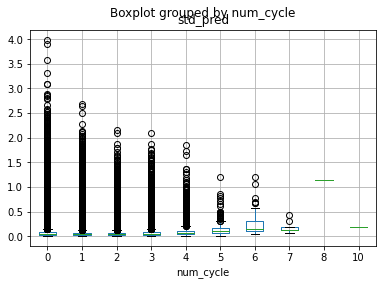

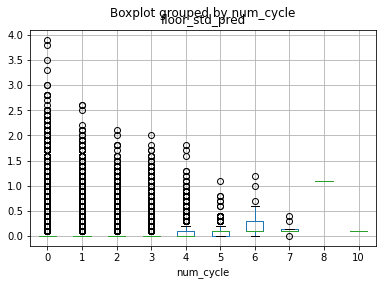

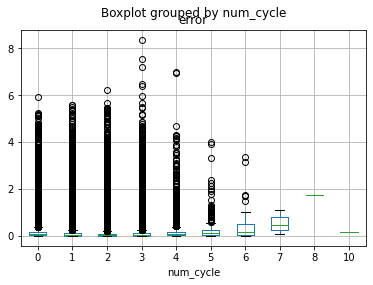

In [132]:
numCycle = valSmilesDF["smiles"].apply(lambda x: calcNumCycle(x)).values
numCycleDF = pd.DataFrame(numCycle, columns=["num_cycle"])
numCycleDF["error"] = valSmilesDF["error"]
numCycleDF["floor_std_pred"] = valSmilesDF["floor_std_pred"]
numCycleDF["std_pred"] = valSmilesDF["std_pred"]

numCycleDF.boxplot("std_pred", by="num_cycle")
numCycleDF.boxplot("floor_std_pred", by="num_cycle")
numCycleDF.boxplot("error", by="num_cycle")

numCycleDF

In [133]:
numCycleDF.corr()

,num_cycle,error,floor_std_pred,std_pred
num_cycle,1.000000,-0.048265,-0.038616,-0.041074
error,-0.048265,1.000000,0.490245,0.507496
floor_std_pred,-0.038616,0.490245,1.000000,0.978785
std_pred,-0.041074,0.507496,0.978785,1.000000


(0.0, 0.25)

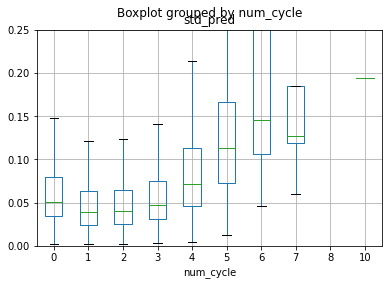

In [135]:
numCycleDF.boxplot("std_pred", by="num_cycle", showfliers=False)
plt.ylim(0, 0.25)

(0.0, 0.25)

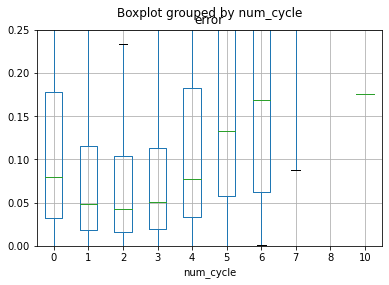

In [129]:
numCycleDF.boxplot("error", by="num_cycle", showfliers=False)
plt.ylim(0, 0.25)


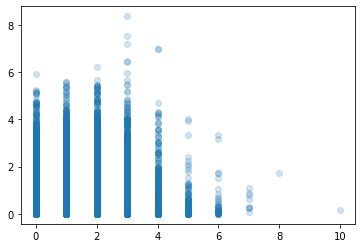

In [126]:
plt.scatter(numCycleDF["num_cycle"], numCycleDF["error"], alpha=0.2)

(array([5.84540e+04, 1.57931e+05, 1.26403e+05, 3.45220e+04, 3.02400e+03,
        2.85000e+02, 4.10000e+01, 8.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

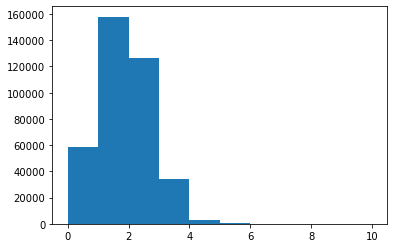

In [130]:
plt.hist(numCycleDF["num_cycle"])

## Molecule-level Descriptor

https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html

can we cluster some of these molecules to certain group

or see if there are any correlations between descriptors and errors/prediction uncertainty

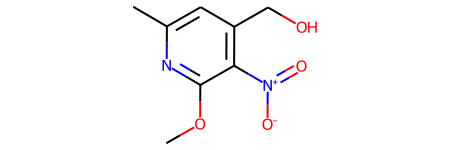

In [109]:
from rdkit import Chem
import rdkit.Chem.Descriptors as D

smiles_string = valSmilesDF.iloc[10].smiles
mol = Chem.MolFromSmiles(smiles_string)
mol

In [39]:
valSmilesDF["mol"] = valSmilesDF["smiles"].apply(lambda x: Chem.MolFromSmiles(x))
valSmilesDF["mol_weight"] = valSmilesDF["mol"].apply(lambda mol: D.ExactMolWt(mol))

In [43]:
valSmilesDF["MaxAbsPartialCharge"] = valSmilesDF["mol"].apply(lambda mol: D.MaxAbsPartialCharge(mol))
valSmilesDF["MinAbsPartialCharge"] = valSmilesDF["mol"].apply(lambda mol: D.MinAbsPartialCharge(mol))
valSmilesDF["NumRadicalElectrons"] = valSmilesDF["mol"].apply(lambda mol: D.NumRadicalElectrons(mol))


In [53]:
valSmilesDF["NumValenceElectrons"] = valSmilesDF["mol"].apply(lambda mol: D.NumValenceElectrons(mol))
valSmilesDF["HeavyAtomMolWt"] = valSmilesDF["mol"].apply(lambda mol: D.HeavyAtomMolWt(mol))
valSmilesDF["MolWt"] = valSmilesDF["mol"].apply(lambda mol: D.MolWt(mol))

In [54]:
valSmilesDF[["mol_weight", "MaxAbsPartialCharge", "MinAbsPartialCharge", "NumRadicalElectrons", "NumValenceElectrons", "HeavyAtomMolWt", "MolWt", "error", "std_pred"]].corr()

,mol_weight,MaxAbsPartialCharge,MinAbsPartialCharge,NumRadicalElectrons,NumValenceElectrons,HeavyAtomMolWt,MolWt,error,std_pred
mol_weight,1.000000,0.162886,0.214907,-0.030557,0.906334,0.989996,0.999978,-0.038934,-0.057514
MaxAbsPartialCharge,0.162886,1.000000,0.548961,-0.016662,0.224740,0.175437,0.161528,-0.021546,-0.039075
MinAbsPartialCharge,0.214907,0.548961,1.000000,-0.002433,0.195391,0.258807,0.214039,-0.028657,-0.021274
NumRadicalElectrons,-0.030557,-0.016662,-0.002433,1.000000,-0.035667,-0.030403,-0.030569,0.003994,0.018195
NumValenceElectrons,0.906334,0.224740,0.195391,-0.035667,1.000000,0.854771,0.904349,-0.010972,-0.042366
HeavyAtomMolWt,0.989996,0.175437,0.258807,-0.030403,0.854771,1.000000,0.990304,-0.050134,-0.061933
MolWt,0.999978,0.161528,0.214039,-0.030569,0.904349,0.990304,1.000000,-0.039089,-0.057668
error,-0.038934,-0.021546,-0.028657,0.003994,-0.010972,-0.050134,-0.039089,1.000000,0.507496
std_pred,-0.057514,-0.039075,-0.021274,0.018195,-0.042366,-0.061933,-0.057668,0.507496,1.000000


In [88]:
from rdkit.ML.Descriptors import MoleculeDescriptors
from tqdm.notebook import tqdm

des_list = ["BalabanJ", "Kappa1", "Chi1", "Chi1n", "Chi3v", "NumHAcceptors",
            "NumRotatableBonds", "NumValenceElectrons", "Ipc", "Kappa2", "Kappa3", "HallKierAlpha", 
            "NumHDonors", "HeavyAtomMolWt", "HeavyAtomCount", "ExactMolWt", "Phi", "Chi0", "LabuteASA"]
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(des_list)

feats = []
for mol in tqdm(valSmilesDF["mol"]):
    feat = [x for x in calculator.CalcDescriptors(mol)]
    feats.append(feat)

featsDF = pd.DataFrame(feats, columns=des_list)
featsDF["error"] = valSmilesDF["error"]
featsDF["std_pred"] = valSmilesDF["std_pred"]

featsDF.corr()[["error", "std_pred"]]

,error,std_pred
BalabanJ,0.015751,0.027524
Kappa1,0.017255,-0.016328
Chi1,-0.039480,-0.056791
Chi1n,0.004742,-0.032023
Chi3v,0.017223,0.009254
NumHAcceptors,-0.031331,-0.025462
NumRotatableBonds,0.030768,-0.007578
NumValenceElectrons,-0.010972,-0.042366
Ipc,-0.007447,0.000087
Kappa2,0.050974,0.017526


In [90]:
from sklearn.linear_model import LinearRegression

X = np.array(feats)
y = valSmilesDF["std_pred"]

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.022018173693877596

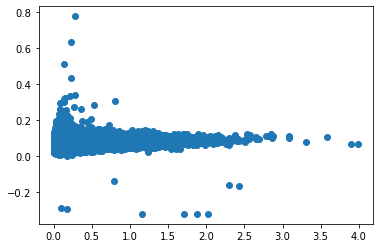

In [96]:
y_pred = reg.predict(X)
plt.scatter(y, y_pred)
plt.show()

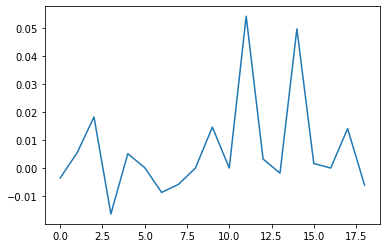

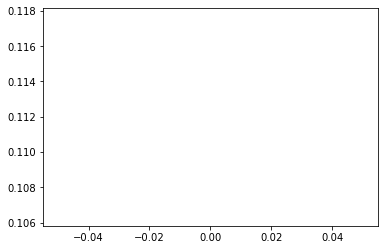

In [93]:
plt.plot(reg.coef_)
plt.show()
plt.plot(reg.intercept_)
plt.show()


In [51]:
smiles_string

array([<rdkit.Chem.rdchem.Mol object at 0x0000020C31C2E7B0>,
       <rdkit.Chem.rdchem.Mol object at 0x0000020C31C2E800>], dtype=object)